In [1]:
import copernicusmarine as cm
import json
from pprint import pprint
cm.__version__

'2.0.0'

In [2]:
dataset_id = 'cmems_obs-ins_glo_phybgcwav_mynrt_na_irr'
username = 'ldrouineau'
password = '********'

In [3]:
dataset_id = 'cmems_obs-ins_glo_phybgcwav_mynrt_na_irr'
username = 'ldrouineau'
password = '*******'
# Define output storage parameters
output_directory = './copernicus-data'

# Call the get function to save data
get_result = cm.get(
    username = username,
    password = password,
    dataset_id=dataset_id,
    index_parts = True,
    output_directory=output_directory,
    no_directories=True)

pprint(f"List of saved files: {get_result}")

INFO - 2025-01-30T14:19:57Z - Selected dataset version: "202311"
INFO - 2025-01-30T14:19:57Z - Selected dataset part: "latest"
INFO - 2025-01-30T14:19:58Z - Listing files on remote server...
1it [00:00, 17.75it/s]

('List of saved files: '
 "files=[FileGet(s3_url='s3://mdl-native-01/native/INSITU_GLO_PHYBGCWAV_DISCRETE_MYNRT_013_030/cmems_obs-ins_glo_phybgcwav_mynrt_na_irr_202311/index_history.txt', "
 "https_url='https://s3.waw3-1.cloudferro.com/mdl-native-01/native/INSITU_GLO_PHYBGCWAV_DISCRETE_MYNRT_013_030/cmems_obs-ins_glo_phybgcwav_mynrt_na_irr_202311/index_history.txt', "
 'file_size=25.94496726989746, '
 "last_modified_datetime='2025-01-30T12:23:11.542000+00:00', "
 'etag=\'"32632d6ed477c5ef2b31ac45ec2797c5-4"\', file_format=\'.txt\', '
 "output_directory=PosixPath('copernicus-data'), filename='index_history.txt', "
 "file_path=PosixPath('copernicus-data/index_history.txt'), "
 "file_status='DOWNLOADED'), "
 "FileGet(s3_url='s3://mdl-native-01/native/INSITU_GLO_PHYBGCWAV_DISCRETE_MYNRT_013_030/cmems_obs-ins_glo_phybgcwav_mynrt_na_irr_202311/index_latest.txt', "
 "https_url='https://s3.waw3-1.cloudferro.com/mdl-native-01/native/INSITU_GLO_PHYBGCWAV_DISCRETE_MYNRT_013_030/cmems_obs-ins_glo_

In [13]:
import pandas as pd

# Define the file path (replace 'file_path.txt' with your actual file path)
file_path = "copernicus-data/index_history.txt"

# Read the file, skipping the header lines starting with "#"
df = pd.read_csv(file_path, skiprows=5)

# Filter rows where 'parameters' column contains 'PSAL'
filtered_df = df[df["parameters"].str.contains(r"VGHS|VAVH|VHM0", na=False)]

/tmp/ipykernel_609/2493879218.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["category"] = filtered_df["file_name"].apply(


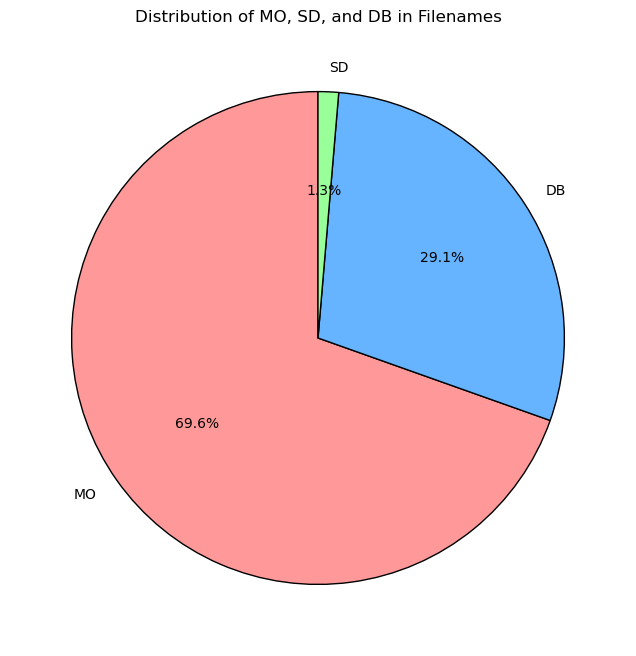

In [14]:
import matplotlib.pyplot as plt

# Filter rows where 'file_name' contains '/history/MO', '/history/SD', or '/history/DB'
filtered_df["category"] = filtered_df["file_name"].apply(
    lambda x: "MO" if "/history/MO" in x else "SD" if "/history/SD" in x else "DB" if "/history/DB" in x else None
)

# Count the occurrences of each category
category_counts = filtered_df["category"].value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 8))
category_counts.plot.pie(
    autopct='%1.1f%%', 
    startangle=90, 
    colors=["#ff9999","#66b3ff","#99ff99"], 
    labels=category_counts.index, 
    wedgeprops={'edgecolor': 'black'}
)
plt.title("Distribution of MO, SD, and DB in Filenames")
plt.ylabel("")  # Remove the default y-axis label
plt.show()

In [15]:
# Filter rows where 'file_name' contains '7810315' or '6200163'
filtered_files = filtered_df[filtered_df["file_name"].str.contains(r"7810315|6200163", na=False)]["file_name"]

# Save the filtered filenames to a file
output_file = "file_list.txt"
filtered_files.to_csv(output_file, index=False, header=False)

In [17]:
# Call the get function to save data
get_result = cm.get(
    username = username,
    password = password,
    dataset_id=dataset_id,
    index_parts = True,
    file_list = output_file,
    output_directory=output_directory,
    no_directories=True)

pprint(f"List of saved files: {get_result}")

INFO - 2025-01-30T14:40:55Z - Selected dataset version: "202311"
INFO - 2025-01-30T14:40:55Z - Selected dataset part: "latest"
INFO - 2025-01-30T14:40:55Z - Listing files on remote server...
1it [00:00, 13.26it/s]

('List of saved files: '
 "files=[FileGet(s3_url='s3://mdl-native-01/native/INSITU_GLO_PHYBGCWAV_DISCRETE_MYNRT_013_030/cmems_obs-ins_glo_phybgcwav_mynrt_na_irr_202311/history/DB/GL_TS_DB_7810315.nc', "
 "https_url='https://s3.waw3-1.cloudferro.com/mdl-native-01/native/INSITU_GLO_PHYBGCWAV_DISCRETE_MYNRT_013_030/cmems_obs-ins_glo_phybgcwav_mynrt_na_irr_202311/history/DB/GL_TS_DB_7810315.nc', "
 'file_size=0.17615985870361328, '
 "last_modified_datetime='2025-01-03T12:48:42+00:00', "
 'etag=\'"99cfca5b35ecb8435a85489a9f38bbe9"\', file_format=\'.nc\', '
 "output_directory=PosixPath('copernicus-data'), "
 "filename='GL_TS_DB_7810315.nc', "
 "file_path=PosixPath('copernicus-data/GL_TS_DB_7810315.nc'), "
 "file_status='DOWNLOADED'), "
 "FileGet(s3_url='s3://mdl-native-01/native/INSITU_GLO_PHYBGCWAV_DISCRETE_MYNRT_013_030/cmems_obs-ins_glo_phybgcwav_mynrt_na_irr_202311/history/MO/GL_TS_MO_6200163.nc', "
 "https_url='https://s3.waw3-1.cloudferro.com/mdl-native-01/native/INSITU_GLO_PHYBGCWAV_D

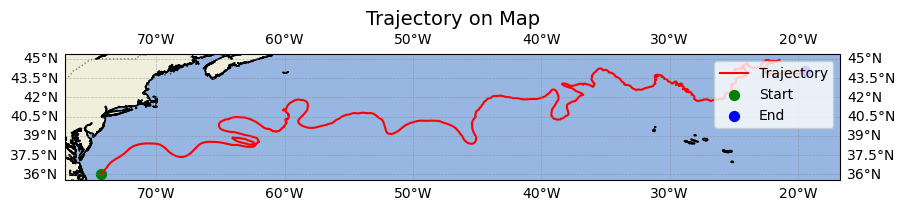

In [18]:
import xarray as xr
import matplotlib.pyplot as plt
from cartopy import crs as ccrs, feature as cfeature

# Define the path to the NetCDF file
file_path = "copernicus-data/GL_TS_DB_7810315.nc"  # Replace with your file path

# Open the NetCDF file using xarray
ds = xr.open_dataset(file_path)

# Extract LATITUDE, LONGITUDE, and TIME
lat = ds["LATITUDE"].values
lon = ds["LONGITUDE"].values
time = ds["TIME"].values  # Optional if you want to annotate or inspect time

# Create a figure and axis with Cartopy's PlateCarree projection
fig, ax = plt.subplots(subplot_kw={"projection": ccrs.PlateCarree()}, figsize=(10, 6))

# Add coastlines and gridlines
ax.coastlines()
ax.gridlines(draw_labels=True, linewidth=0.5, color="gray", alpha=0.5, linestyle="--")

# Add features (e.g., land, oceans)
ax.add_feature(cfeature.LAND, edgecolor="black", zorder=1)
ax.add_feature(cfeature.OCEAN, zorder=0)
ax.add_feature(cfeature.BORDERS, linestyle=":", alpha=0.5)

# Plot the trajectory
sc = ax.plot(lon, lat, color="red", linewidth=1.5, label="Trajectory")

# Annotate (optional) with start and end points
ax.scatter(lon[0], lat[0], color="green", s=50, label="Start")
ax.scatter(lon[-1], lat[-1], color="blue", s=50, label="End")

# Add a legend
ax.legend(loc="upper right")

# Title and labels
plt.title("Trajectory on Map", fontsize=14)
plt.show()

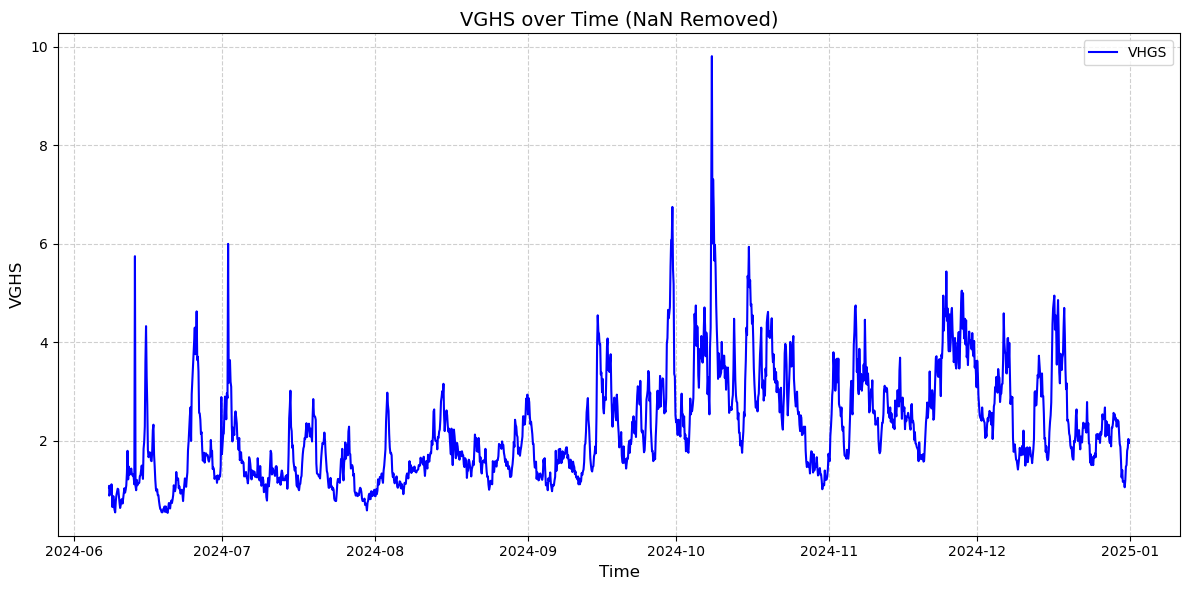

In [26]:
import numpy as np

# Extract VHGS and TIME
vghs = ds["VGHS"].isel(DEPTH=1).values
time = ds["TIME"].values

# Remove NaN values
mask = ~np.isnan(vghs)  # Create a mask for non-NaN values
vghs_clean = vghs[mask]
time_clean = time[mask]

# Plot VHGS over TIME without NaN values
plt.figure(figsize=(12, 6))
plt.plot(time_clean, vghs_clean, color="blue", linewidth=1.5, label="VHGS")

# Customize the plot
plt.xlabel("Time", fontsize=12)
plt.ylabel("VGHS", fontsize=12)
plt.title("VGHS over Time (NaN Removed)", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend(loc="upper right", fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()

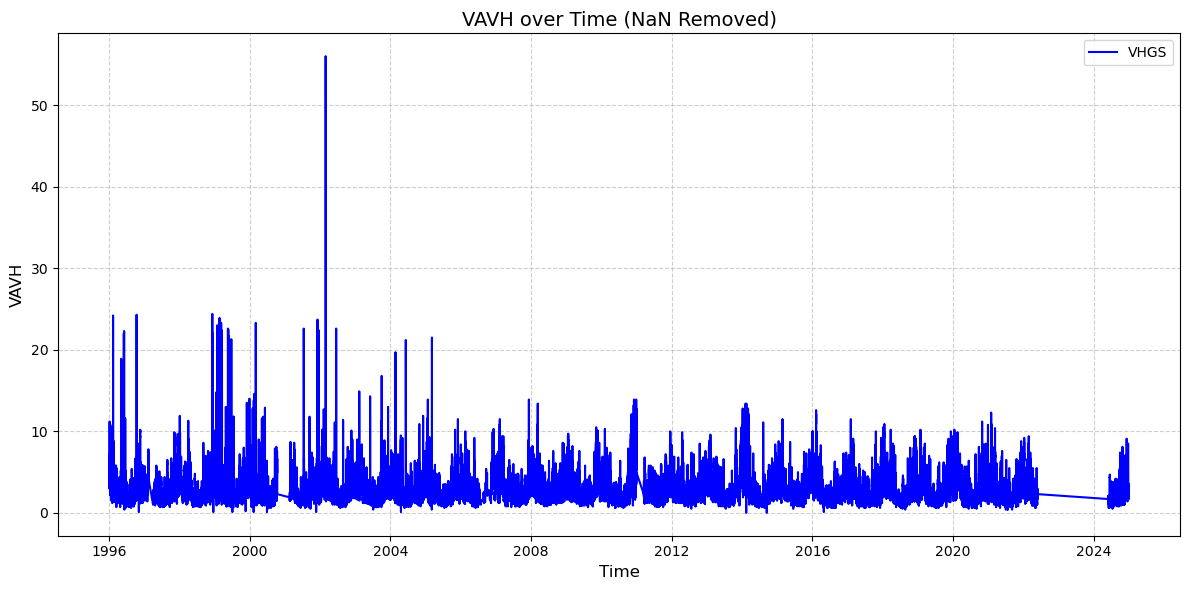

In [28]:
import xarray as xr
import matplotlib.pyplot as plt
from cartopy import crs as ccrs, feature as cfeature

# Define the path to the NetCDF file
file_path = "copernicus-data/GL_TS_MO_6200163.nc"  # Replace with your file path

# Open the NetCDF file using xarray
ds = xr.open_dataset(file_path)

# Extract VAVH and TIME
vavh = ds["VAVH"].isel(DEPTH=1).values
time = ds["TIME"].values

# Remove NaN values
mask = ~np.isnan(vavh)  # Create a mask for non-NaN values
vavh_clean = vavh[mask]
time_clean = time[mask]

# Plot VHGS over TIME without NaN values
plt.figure(figsize=(12, 6))
plt.plot(time_clean, vavh_clean, color="blue", linewidth=1.5, label="VHGS")

# Customize the plot
plt.xlabel("Time", fontsize=12)
plt.ylabel("VAVH", fontsize=12)
plt.title("VAVH over Time (NaN Removed)", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend(loc="upper right", fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()